[ART网络原帖](https://blog.csdn.net/u013468614/article/details/94751690)


[ART网络原帖](https://blog.csdn.net/YongJinJiang/article/details/79644213)

[ART网络原帖](https://its401.com/article/m0_46557838/105181735)

一、基础概念：

ART（Adaptive Resonance Theory,自适应谐振理论网络） ART是一种**自组织神经网络结构，是无教师的学习网络**。当在神经网络和环境有交互作用时， 对环境信息的编码会自发地在神经网中产生， 则认为神经网络在进行自组织活动。

ART网络的思路是当网络接收新的输入时，按照预设定的参考门限检查该输入模式与所有存储模式类典型向量之间的匹配程度以确定相似度，对相似度超过门限的所有模式类，选择最相似的作为该模式的代表类，并调整与该类别相关的权值，以使后续与该模式相似的输入再与该模式匹配时能够得到更大的相似度。若相似度都不超过门限，就在网络中新建一个模式类，同时建立与该模式类相连的权值，用于代表和存储该模式以及后来输入的所有同类模式。

目前，ART 有很多版本：

**ART1**是最早的版本，ART1 含有并行架构的主-从式算法（leader-followeralgorithm），在算法的激活及匹配函数中运用了集合运算，**主要处理只含 0 与 1** 的影像（即黑白）识别问题。

**ART2可以处理灰度（即模拟值）输入**

**ART3具有多级搜索架构**，**它融合了前两种结构的功能并将两层神经网络扩展为任意多层的神经元网络**。由于ART3 在神经元的运行模型中纳入了神经元的生物电化学反应机制，因而其功能和能力得到了进一步扩展。





二、与经典BP区别与联系

人类智能的特性之一是能在不忘记以前学习过的事物的基础上继续学习新事物。这项特性是目前多数类神经网络模型所欠缺的，这些类神经网络模型(例如反向传播类神经网络)一般都需要事先准备好的训练模式集进行训练。当训练完毕之后，神经元之间的连接强度就确定了，除非再有新的训练动作发生，否则这些连接强度不会再有任何改变。当有新模式出现时，这些类神经网络模型只能由用户将新模式加到训练模式中，形成新的训练模式集，然后重新训练所有神经元间的连接强度，也就是旧有的知识必须重新训练一遍。**这些类神经网络模型，只有记忆而没有智能，没有辨识新事件出现的能力，也没有自我学习扩充记忆的能力,就好比现在的太阳是圆形。现有模型很容易分辨哪个是太阳。但是过几年太阳变成了方形，就要重新训练模型了.ART的思路在于对输入进去的方形太阳与之前经典的圆形太阳进行比对，他们之间有个相似度a，方形太阳和其他类别如月亮火星地球也有相似度bcd，但是a最大且超过了预设的阈值（这时候阈值小，好比人类的认知界限，过了这个阈值就认为方形太阳属于太阳类）（种类少）。所以从此以后网络认为方形太阳也是太阳。更新了记忆，以后再有方形太阳也能直接认出来了。如果a不超过阈值（这时候阈值大），就说明他是个新事物。我愿称之为方形星（种类多）**

**ART不像其它类神经网络模型，分为训练阶段及测试阶段，需事先准备好训练模式集及测试模式集。ART时时处在训练状态及测试状态。当它开始工作的时候可以不用确定到底需要多少个神经元，先给几个就行，或者根本不用给它。ART的学习就像小孩成长一样，头脑也会同步长大。当 ART发现记忆的神经元不够用时，会动态长出新的神经元去记忆新模式，形成新聚类，而不会影响到己经存在的神经元间的连接，因此 ART 可以在不忘掉先前学习过的事物的情况下，继续学习新事物。**

 ART1人工神经网络由两层神经元组成，分别称为比较层（输入层）和识别层（输出层）。类别判断是由在识别层中的一个单一神经元来作出的，类似于大脑皮层感受区中的细胞组，比较层中的神经元对模式的输入特性做出响应。在这两层之间的突触连接（权值）可以根据两种不同的学习规则进行双向修改。识别层的神经元具有允许竞争的抑制连接。该网络结构还包括三个附加模块，即增益1、增益2和复位模块，如下图：

ART1网络的拓扑结构如下图：

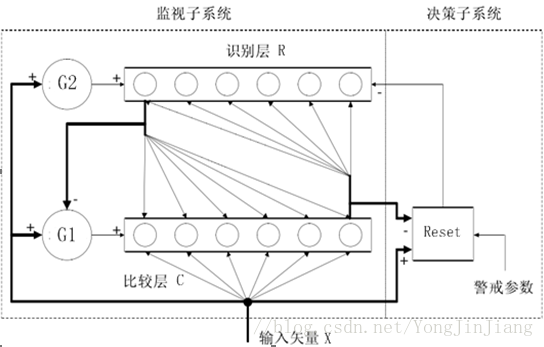

二、功能及Python实现

In [18]:
# coding=utf-8
import numpy as np


# 初始化内心向量矩阵B 和外星向量矩阵T （每一列标识一个 内星/外星 向量）
# 内星向量是C层传入R层的权值 ，外星向量是R层记录模式的向量，R层反馈给C层
def Set_B0_T0(n):
    b = 1 / (1 + n)
    B = []
    T = []
    for i in range(n):
        B.append(b)
        T.append(1)
    # 先构造 一列初始向量，再将向量矩阵化（因为后续的算法针对矩阵化的 matrix类型进行）
    # numpy的mat函数就是将向量转化成矩阵的
    B = np.mat(B)
    T = np.mat(T)
    # 矩阵.T 表示矩阵的转置，将一行转成一列了（因为我是用列来表示 内\外 星向量的）
    B = B.T
    T = T.T
    return B, T


# 当竞争获胜向量匹配成功后，才有权力改变它的 内\外星向量权值
# 参照书本给的方式，定义权值改变函数
def AdjustBT(B, T, x, j):
    x = np.mat(x)
    xigama_TX = x * T[:, j]  # 矩阵*矩阵= 表示矩阵乘法
    xigama_TX = xigama_TX[0, 0]
    B[:, j] = np.multiply(T[:, j], x.T) * (1 / (0.5 + xigama_TX))
    T[:, j] = np.multiply(T[:, j], x.T)  # np.multiply 是矩阵点乘
    return B, T


# 定义 竞争函数，选取R层竞争获胜的向量；由于每次只选一个竞争获胜的向量，再配对不成功的回调过程中
# 会造成Python代码十分麻烦的内嵌函数形式，所以我直接比较他们并且排序，返回一个按大小顺序排列的索引 list
# 如果需要回调，我直接再这个list 里面依次选择就行了 ，十分方便
def Competitor(B, x):
    x = np.mat(x)  # x参数开始是一个list ，因为矩阵运算需要 务必将其转成矩阵形式
    J = B.shape[1]  # J算出矩阵的列数 shape 返回一个二元元组，表示行数和列数 选取第二个即可
    competition = []  # 用于接收x与每个内星向量的乘积和，方便后续比较
    for j in range(J):
        compe = x * B[:, j]  # x与每个内星向量的乘积和
        competition.append(compe[0, 0])
    competition = np.array(competition)  # 只有array 类型才能直接抽取按大小排序后的索引
    j_order = np.argsort(-competition)  # 按大小排序后的索引
    j_order = list(j_order)  # 由于后边要用j_order 循环所以又要转会List类型
    return j_order


# 竞争成功的R层节点，通过外星向量和x 匹配，rou0是设置的匹配度大小
def Match(T, x, j, rou0):
    N0 = sum(x)
    x = np.mat(x)
    N = x * T[:, j]
    N = N[0, 0]  # 由于N是一个（1x1）矩阵 所以要提取其中的值
    rou = N / N0
    if rou >= rou0:  # 按照匹配原则，大于设定匹配度的算匹配成功
        matchBOOL = True
    else:
        matchBOOL = False
    return matchBOOL


# 当所有R层节点匹配不成功，要曾加一个R层节点，增加节点的内\外星向量
def ADD_BT(B, T, x, n):
    b = x  # 内星向量设为x
    b = np.mat(b).T
    B = np.hstack((B, b))  # 原来的B 与 新增的内星列向量进行拼接
    L = [1] * n  # 外星向量设为 1
    L = np.mat(L).T
    T = np.hstack((T, L))
    return B, T


# 根据匹配是否成功进行归类
def Group(B, T, x, j_order, Groups, rou0, n):
    success = 0
    for j in j_order:  # 对j_order 进行依次匹配
        matchBOOL = Match(T, x, j, rou0)
        if matchBOOL:  # 若x在这个j节点匹配成功，这个组加上这个x
            B, T = AdjustBT(B, T, x, j)
            jj = j + 1
            if jj not in Groups:  # 在字典加东西的 一贯手法
                Groups[jj] = [x]
            else:
                Groups[jj].append(x)
            print(x, '分组成功，分在{}组'.format(jj))
            success = 1  # 匹配成功，success变成1 不再进行后面操作
            break
    if success == 0:  # 如果匹配不成功
        B, T = ADD_BT(B, T, x, n)  # 增加R层一个节点
        jj = B.shape[1]  # 获取最后一列的索引，它肯定就是只会的匹配成功节点了
        B, T = AdjustBT(B, T, x, jj - 1)  # 匹配成功就调整相应内外星向量
        Groups[jj] = [x]
        print(x, '分组成功，分在{}组'.format(jj))
    return B, T, Groups


# 主函数
def ART(train_X, rou0):
    n = len(train_X[0])  # 取x的维数
    Groups = {
    }  # 初始分组
    B, T = Set_B0_T0(n)  # 初始B、T
    for x in X:  # 对每一个x进行判断归类
        j_order = Competitor(B, x)  # 竞争
        B, T, Groups = Group(B, T, x, j_order, Groups, rou0, n)  # 分组
    print('*****' * 30)

    # 以下是显示分组结果
    for key, value in Groups.items():
        print('第', key, '组:')
        for x in value:
            print(x)
        print('----' * 20)


rou0 = 0.9#阈值，手动调整
X = [[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
     [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1]]
n = len(X)
ART(X, rou0)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1] 分组成功，分在1组
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1] 分组成功，分在2组
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1] 分组成功，分在3组
[1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1] 分组成功，分在4组
******************************************************************************************************************************************************
第 1 组:
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
--------------------------------------------------------------------------------
第 2 组:
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
--------------------------------------------------------------------------------
第 3 组:
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
--------------------------------------------------------------------------------
第 4 组:
[1, 0,

**RT网络的特点是非离线学习，即不是对输入样本反复训练后才开始运行，而是边学习边运行的实时方式**，每个输出神经元可以看做一类相近样本的代表，每次最多只有一个输出神经元1。当输入样本距离某一个内星权向量较近时，代表它输出神经元才响应，通过调整警戒门限的大小，可调整模式的类数，ρ小，模式的类别少，ρ大，则模式的类别多。
用硬件实现ART I模型时，C层和R层的神经元都用电路实现，作为长期记忆的权值用CMOS电路完成。